### 41518010042 - Muhammad Ramzy Alfinrizq Ramadhan
### Deep Learning - D-306 - 07.30 - Selasa

### Library

In [ ]:
# mengimpor library yang digunakan
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re
import sys
import warnings
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

### Dataset
Dataset didapatkan dari: https://github.com/ygterl/EDA-Netflix-2020-in-R/blob/master/netflix_titles.csv

In [ ]:
# Upload Dataset
from google.colab import files
df_netflix = files.upload()

titles = pd.read_csv("netflix_titles (1).csv")
titles.head()

Saving netflix_titles (1).csv to netflix_titles (1).csv


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [ ]:
print(titles.shape)

(6234, 12)


### Data Wrangling

In [ ]:
description_category = titles[['listed_in','description']]
description_category['listed_in'] = description_category['listed_in'].apply(lambda x: x.split(', '))
description_category.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,listed_in,description
0,"[Children & Family Movies, Comedies]",Before planning an awesome wedding for his gra...
1,[Stand-Up Comedy],Jandino Asporaat riffs on the challenges of ra...
2,[Kids' TV],"With the help of three human allies, the Autob..."
3,[Kids' TV],When a prison ship crash unleashes hundreds of...
4,[Comedies],When nerdy high schooler Dani finally attracts...


In [ ]:
columns = ['category_1', 'category_2', 'category_3']
cat = pd.DataFrame(description_category['listed_in'].to_list(), columns = columns)
cat.head()

,category_1,category_2,category_3
0,Children & Family Movies,Comedies,None
1,Stand-Up Comedy,None,None
2,Kids' TV,None,None
3,Kids' TV,None,None
4,Comedies,None,None


In [ ]:
category_1_genres = cat.category_1.unique()
category_2_genres = cat.category_2.unique()
category_3_genres = cat.category_3.unique()

genres = np.concatenate([category_1_genres, category_2_genres, category_3_genres])
genres = list(dict.fromkeys(genres))
genres = [x for x in genres if x is not None]
len(genres)

42

In [ ]:
cat = pd.concat([cat,pd.DataFrame(columns = list(genres))])
cat.fillna(0, inplace = True)
cat.head()

,category_1,category_2,category_3,Children & Family Movies,Stand-Up Comedy,Kids' TV,Comedies,Crime TV Shows,International Movies,Docuseries,Action & Adventure,Cult Movies,Documentaries,Horror Movies,Dramas,International TV Shows,Romantic TV Shows,TV Comedies,British TV Shows,Anime Features,Independent Movies,Reality TV,Anime Series,TV Horror,Movies,Stand-Up Comedy & Talk Shows,Thrillers,TV Action & Adventure,Classic Movies,TV Dramas,Music & Musicals,Sci-Fi & Fantasy,TV Shows,Spanish-Language TV Shows,Sports Movies,Classic & Cult TV,Romantic Movies,TV Sci-Fi & Fantasy,Science & Nature TV,Korean TV Shows,Teen TV Shows,LGBTQ Movies,TV Mysteries,TV Thrillers,Faith & Spirituality
0,Children & Family Movies,Comedies,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Stand-Up Comedy,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Kids' TV,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Kids' TV,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Comedies,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
row = 0
for genre in cat['category_1']:
    if genre != 0:
        cat.loc[row, genre] = 1
    row = row + 1

In [ ]:
row = 0
for genre in cat['category_2']:
    if genre != 0:
        cat.loc[row, genre] = 1
    row = row + 1

In [ ]:
row = 0
for genre in cat['category_3']:
    if genre != 0:
        cat.loc[row, genre] = 1
    row = row + 1
    
cat.head()

,category_1,category_2,category_3,Children & Family Movies,Stand-Up Comedy,Kids' TV,Comedies,Crime TV Shows,International Movies,Docuseries,Action & Adventure,Cult Movies,Documentaries,Horror Movies,Dramas,International TV Shows,Romantic TV Shows,TV Comedies,British TV Shows,Anime Features,Independent Movies,Reality TV,Anime Series,TV Horror,Movies,Stand-Up Comedy & Talk Shows,Thrillers,TV Action & Adventure,Classic Movies,TV Dramas,Music & Musicals,Sci-Fi & Fantasy,TV Shows,Spanish-Language TV Shows,Sports Movies,Classic & Cult TV,Romantic Movies,TV Sci-Fi & Fantasy,Science & Nature TV,Korean TV Shows,Teen TV Shows,LGBTQ Movies,TV Mysteries,TV Thrillers,Faith & Spirituality
0,Children & Family Movies,Comedies,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Stand-Up Comedy,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Kids' TV,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Kids' TV,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Comedies,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
description_category = pd.concat([description_category['description'], 
                                     cat.loc[:,"Children & Family Movies":]],
                                    axis=1)
description_category.head()

,description,Children & Family Movies,Stand-Up Comedy,Kids' TV,Comedies,Crime TV Shows,International Movies,Docuseries,Action & Adventure,Cult Movies,Documentaries,Horror Movies,Dramas,International TV Shows,Romantic TV Shows,TV Comedies,British TV Shows,Anime Features,Independent Movies,Reality TV,Anime Series,TV Horror,Movies,Stand-Up Comedy & Talk Shows,Thrillers,TV Action & Adventure,Classic Movies,TV Dramas,Music & Musicals,Sci-Fi & Fantasy,TV Shows,Spanish-Language TV Shows,Sports Movies,Classic & Cult TV,Romantic Movies,TV Sci-Fi & Fantasy,Science & Nature TV,Korean TV Shows,Teen TV Shows,LGBTQ Movies,TV Mysteries,TV Thrillers,Faith & Spirituality
0,Before planning an awesome wedding for his gra...,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Jandino Asporaat riffs on the challenges of ra...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"With the help of three human allies, the Autob...",0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,When a prison ship crash unleashes hundreds of...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,When nerdy high schooler Dani finally attracts...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
bar_plot = pd.DataFrame()
bar_plot['cat'] = description_category.columns[1:]
bar_plot['count'] = description_category.iloc[:,1:].sum().values
bar_plot.sort_values(['count'], inplace=True, ascending=False)
bar_plot.reset_index(inplace=True, drop=True)
bar_plot.head()

,cat,count
0,International Movies,1927
1,Dramas,1623
2,Comedies,1113
3,International TV Shows,1001
4,Documentaries,668


In [ ]:
threshold = 200

#### Visualisasi untuk melihat genre/kategori yang paling banyak

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


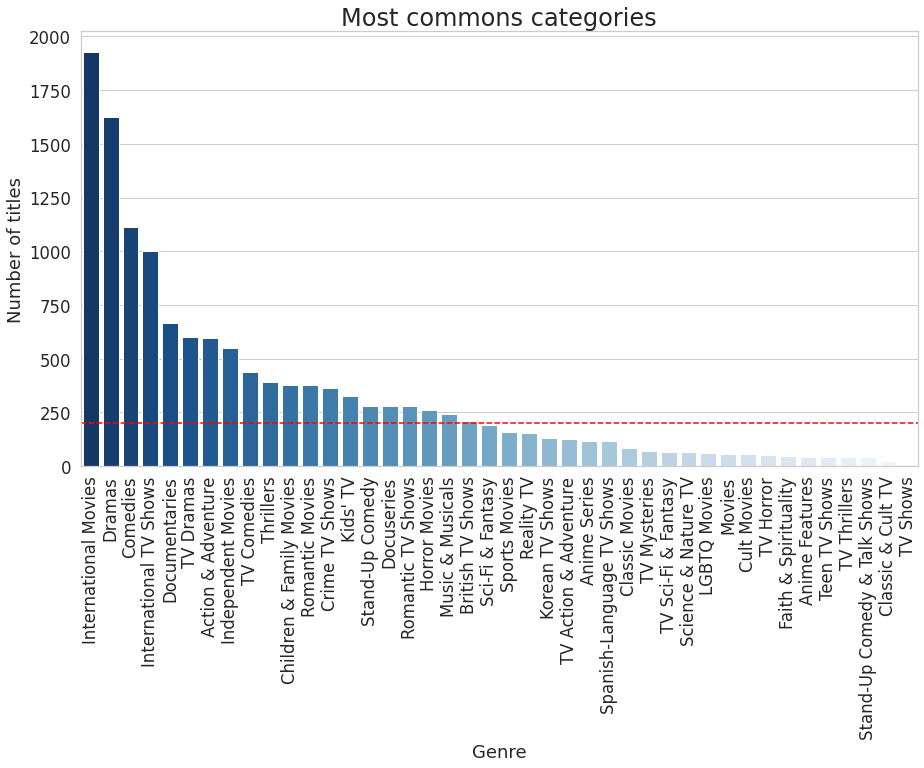

In [ ]:
# Visualisasi kategori terbanyak
plt.figure(figsize=(15,8))
sns.set(font_scale = 1.5)
sns.set_style('whitegrid') 


pal = sns.color_palette("Blues_r", len(bar_plot))
rank = bar_plot['count'].argsort().argsort()  

sns.barplot(bar_plot['cat'], bar_plot['count'], palette=np.array(pal[::-1])[rank])
plt.axhline(threshold, ls='--', c='red')
plt.title("Most commons categories", fontsize=24)
plt.ylabel('Number of titles', fontsize=18)
plt.xlabel('Genre', fontsize=18)
plt.xticks(rotation='vertical')

plt.show()

In [ ]:
main_categories = pd.DataFrame()
main_categories = bar_plot[bar_plot['count']>200]
categories = main_categories['cat'].values
categories = np.append(categories,'Others')
not_category = []
description_category['Others'] = 0

for i in description_category.columns[1:]:
    if i not in categories:
        description_category['Others'][description_category[i] == 1] = 1
        not_category.append(i)

description_category.drop(not_category, axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # 

In [ ]:
most_common_cat = pd.DataFrame()
most_common_cat['cat'] = description_category.columns[1:]
most_common_cat['count'] = description_category.iloc[:,1:].sum().values
most_common_cat.sort_values(['count'], inplace=True, ascending=False)
most_common_cat.reset_index(inplace=True, drop=True)
most_common_cat.head()

,cat,count
0,International Movies,1927
1,Dramas,1623
2,Others,1574
3,Comedies,1113
4,International TV Shows,1001


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


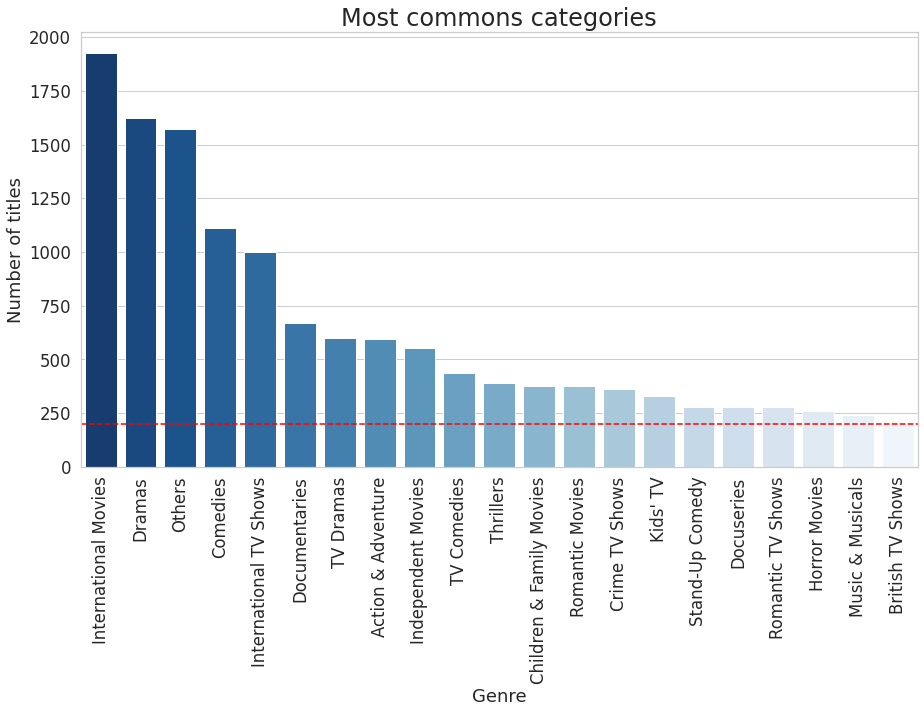

In [ ]:
# Visualisasi kategori terbanyak
plt.figure(figsize=(15,8))
sns.set(font_scale = 1.5)
sns.set_style('whitegrid') 


pal = sns.color_palette("Blues_r", len(most_common_cat))
rank = most_common_cat['count'].argsort().argsort()  

sns.barplot(most_common_cat['cat'], most_common_cat['count'], palette=np.array(pal[::-1])[rank])
plt.axhline(threshold, ls='--', c='red')
plt.title("Most commons categories", fontsize=24)
plt.ylabel('Number of titles', fontsize=18)
plt.xlabel('Genre', fontsize=18)
plt.xticks(rotation='vertical')

plt.show()

#### Visualisasi untuk perbandingan jumlah genre per film

In [ ]:
rowSums = description_category.iloc[:,1:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


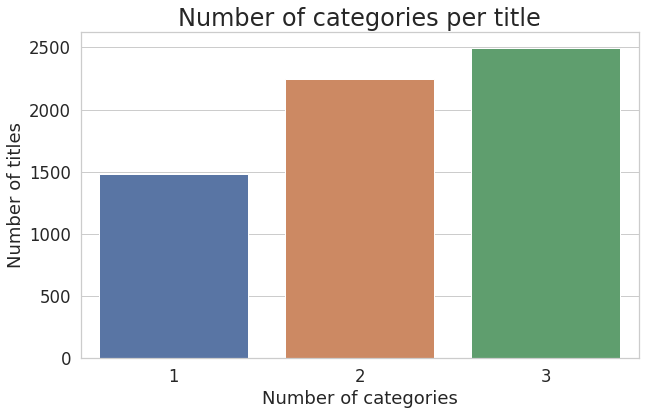

In [ ]:
sns.set(font_scale = 1.5)
sns.set_style('whitegrid') 
plt.figure(figsize=(10,6))

sns.barplot(multiLabel_counts.index, multiLabel_counts.values)
plt.title("Number of categories per title", fontsize=24)
plt.ylabel('Number of titles', fontsize=18)
plt.xlabel('Number of categories', fontsize=18)

plt.show()

#### Visualisasi untuk melihat distribusi penggunaan kata per kolom deskripsi

In [ ]:
boxplot = description_category.copy()
boxplot['len'] = description_category.description.apply(lambda x: len(x))

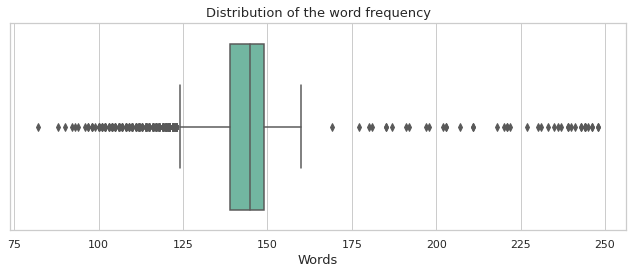

In [ ]:
sns.set(style="whitegrid",rc={"font.size":13,"axes.labelsize":13})

plt.figure(figsize=(9, 4))

ax = sns.boxplot(x='len', data=boxplot, orient="h", palette="Set2")
plt.ylabel('')
plt.xlabel('Words')
plt.title("Distribution of the word frequency", fontsize=13)
plt.tight_layout(h_pad=3)

#### Visualisasi untuk menggambarkan kata yang paling banyak digunakan pada kolom deskripsi

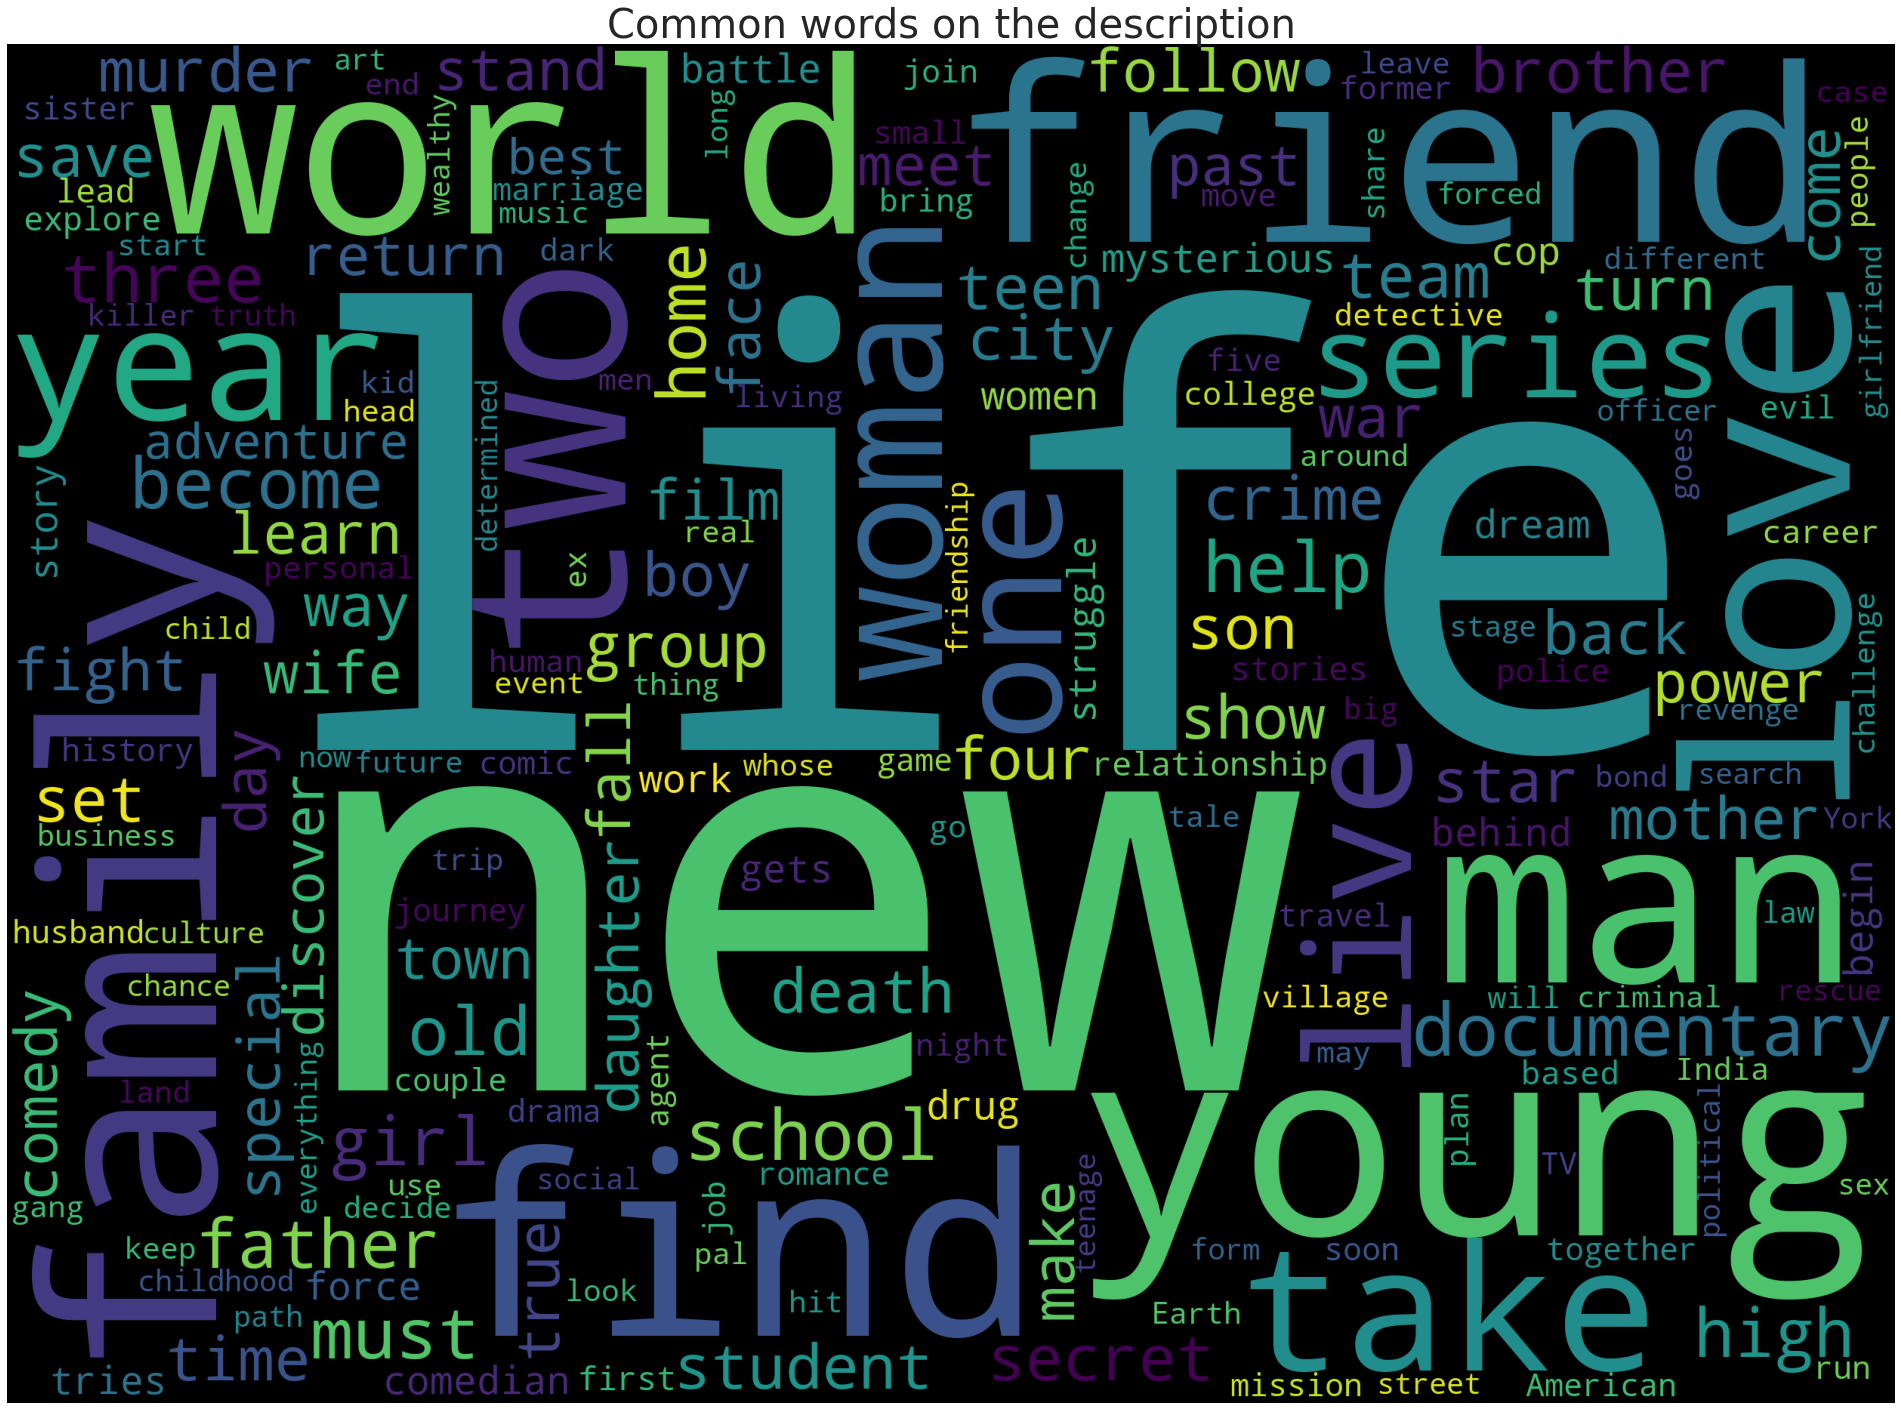

In [ ]:
#menampilkan kata yang digunakan paling banyak pada kolom deskripsi di dataset
from wordcloud import WordCloud,STOPWORDS

plt.figure(figsize=(40,25))
text = description_category.description.values
cloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))
plt.axis('off')
plt.title("Common words on the description",fontsize=40)
plt.imshow(cloud)

#### Pembentukan tabel model-model yang akan digunakan

In [ ]:
"""
Model ML:
OneVsAll = SVM OvA
BinaryRelevance = Naive Bayes
ClassifierChain = Regresi Logistik 
MultipleOutput = KNN

Model DL:
DNN 
CNN 
LSTM
"""
columns=['OneVsAll', 'BinaryRelevance', 'ClassifierChain', 'MultipleOutput','DNN', 'CNN', 'LSTM']
results = pd.DataFrame(columns = columns)
results

,OneVsAll,BinaryRelevance,ClassifierChain,MultipleOutput,DNN,CNN,LSTM


In [ ]:
seeds = [1, 43, 678, 90, 135]

In [ ]:
t = results.copy()
t

,OneVsAll,BinaryRelevance,ClassifierChain,MultipleOutput,DNN,CNN,LSTM


#### Text Pre-processing (untuk pengolahan kata)

In [ ]:
# melakukan pre-processing untuk kata-kata pada kolom deskripsi untuk menghilangkan imbuhan, simbol, stopwords, dan mengubah huruf kapital menjadi lowercase
def decontract(sentence):
    # specific
    sentence = re.sub(r"won't", "will not", sentence)
    sentence = re.sub(r"can\'t", "can not", sentence)

    # general
    sentence = re.sub(r"n\'t", " not", sentence)
    sentence = re.sub(r"\'re", " are", sentence)
    sentence = re.sub(r"\'s", " is", sentence)
    sentence = re.sub(r"\'d", " would", sentence)
    sentence = re.sub(r"\'ll", " will", sentence)
    sentence = re.sub(r"\'t", " not", sentence)
    sentence = re.sub(r"\'ve", " have", sentence)
    sentence = re.sub(r"\'m", " am", sentence)
    return sentence

def cleanPunc(sentence): 
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned

def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', '', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub("", sentence)

In [ ]:
# membuat set stopwords
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

re_stop_words = re.compile(r"\b(" + "|".join(stopwords) + ")\\W", re.I)

In [ ]:
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

In [ ]:
# menerapkan pre-processing kata di atas
description_category['description'] = description_category['description'].str.lower()
description_category['description'] = description_category['description'].apply(decontract)
description_category['description'] = description_category['description'].apply(cleanPunc)
description_category['description'] = description_category['description'].apply(keepAlpha)
description_category['description'] = description_category['description'].apply(removeStopWords)
description_category['description'] = description_category['description'].apply(stemming)

In [ ]:
# membagi ukuran data uji dan data latih (data uji = 30%; data latih = 70%)
X_train, X_test, y_train, y_test = train_test_split(description_category['description'], 
                                                    description_category[description_category.columns[1:]], 
                                                    test_size=0.3, 
                                                    random_state=seeds[4], 
                                                    shuffle=True)
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2') # mvectorisasi menggunakan TF-IDF
vectorizer.fit(X_train)

X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

## Models Machine Learning

In [ ]:
# mengimpor library yang akan digunakan untuk pemodelan
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier

# melakukan proses latih untuk model per kategori
LR_pipeline = Pipeline([('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1))])
accuracy = 0
for category in description_category.columns[1:]:
    print('**Processing {} titles...**'.format(category))
    
    # melatih regresesi logistik pada set training
    LR_pipeline.fit(X_train, y_train[category])
    
    # menghitung hasil akurasi latihan
    prediction = LR_pipeline.predict(X_test)
    accuracy = accuracy + accuracy_score(y_test[category], prediction)
    print('AUC ROC score is {}'.format(roc_auc_score(y_test[category],prediction)))
    print("\n")

print('Test averaged AUC ROC is {}'.format(accuracy/len(description_category.columns[1:])))

**Processing Children & Family Movies titles...**
AUC ROC score is 0.5


**Processing Stand-Up Comedy titles...**
AUC ROC score is 0.5180722891566265


**Processing Kids' TV titles...**
AUC ROC score is 0.5


**Processing Comedies titles...**
AUC ROC score is 0.5


**Processing Crime TV Shows titles...**
AUC ROC score is 0.5


**Processing International Movies titles...**
AUC ROC score is 0.5471825652240222


**Processing Docuseries titles...**
AUC ROC score is 0.5


**Processing Action & Adventure titles...**
AUC ROC score is 0.5


**Processing Documentaries titles...**
AUC ROC score is 0.5386158062505145


**Processing Horror Movies titles...**
AUC ROC score is 0.5


**Processing Dramas titles...**
AUC ROC score is 0.5411719941340407


**Processing International TV Shows titles...**
AUC ROC score is 0.5


**Processing Romantic TV Shows titles...**
AUC ROC score is 0.5


**Processing TV Comedies titles...**
AUC ROC score is 0.5


**Processing British TV Shows titles...**
AUC ROC score

In [ ]:
# import library Naive Bayes untuk model Naive Bayes
from sklearn.naive_bayes import MultinomialNB

NB_pipeline = Pipeline([('clf', OneVsRestClassifier(MultinomialNB(
                    fit_prior=True, class_prior=None)))])
accuracy = 0
for category in description_category.columns[1:]:
    print('**Processing {} titles...**'.format(category))
    
    # melatih klasifikasi NB pada set training
    NB_pipeline.fit(X_train, y_train[category])
    
    # menghitung hasil akurasi latihan
    prediction = NB_pipeline.predict(X_test)
    accuracy = accuracy + accuracy_score(y_test[category], prediction)
    print('AUC ROC is {}'.format(roc_auc_score(y_test[category],prediction)))
    print("\n")

print('Test averaged AUC ROC is {}'.format(accuracy/len(description_category.columns[1:])))

**Processing Children & Family Movies titles...**
AUC ROC is 0.5


**Processing Stand-Up Comedy titles...**
AUC ROC is 0.5


**Processing Kids' TV titles...**
AUC ROC is 0.5


**Processing Comedies titles...**
AUC ROC is 0.5


**Processing Crime TV Shows titles...**
AUC ROC is 0.5


**Processing International Movies titles...**
AUC ROC is 0.5024311183144247


**Processing Docuseries titles...**
AUC ROC is 0.5


**Processing Action & Adventure titles...**
AUC ROC is 0.5


**Processing Documentaries titles...**
AUC ROC is 0.5


**Processing Horror Movies titles...**
AUC ROC is 0.5


**Processing Dramas titles...**
AUC ROC is 0.5020040080160321


**Processing International TV Shows titles...**
AUC ROC is 0.5


**Processing Romantic TV Shows titles...**
AUC ROC is 0.5


**Processing TV Comedies titles...**
AUC ROC is 0.5


**Processing British TV Shows titles...**
AUC ROC is 0.5


**Processing Independent Movies titles...**
AUC ROC is 0.5


**Processing Thrillers titles...**
AUC ROC is 0.5

In [ ]:
# import library regresi linear untuk model regresi linear
from sklearn.svm import LinearSVC

SVC_pipeline = Pipeline([('clf', OneVsRestClassifier(LinearSVC(), n_jobs=1))])

accuracy = 0
for category in description_category.columns[1:]:
    print('**Processing {} titles...**'.format(category))
    
    # melatih SVM pada set training
    SVC_pipeline.fit(X_train, y_train[category])
    
    # menghitung hasil akurasi latihan
    prediction = SVC_pipeline.predict(X_test)
    accuracy = accuracy + roc_auc_score(y_test[category], prediction)
    print('AUC ROC is {}'.format(roc_auc_score(y_test[category],prediction)))
    print("\n")

print('Test averaged AUC ROC is {}'.format(accuracy/len(description_category.columns[1:])))

**Processing Children & Family Movies titles...**
AUC ROC is 0.5345185673346713


**Processing Stand-Up Comedy titles...**
AUC ROC is 0.8715364814964557


**Processing Kids' TV titles...**
AUC ROC is 0.667204090938701


**Processing Comedies titles...**
AUC ROC is 0.5598692976578326


**Processing Crime TV Shows titles...**
AUC ROC is 0.5822908132182097


**Processing International Movies titles...**
AUC ROC is 0.6476468170573775


**Processing Docuseries titles...**
AUC ROC is 0.6247195737521032


**Processing Action & Adventure titles...**
AUC ROC is 0.5598451327433628


**Processing Documentaries titles...**
AUC ROC is 0.6885284707764329


**Processing Horror Movies titles...**
AUC ROC is 0.5360263943612047


**Processing Dramas titles...**
AUC ROC is 0.6379018970886379


**Processing International TV Shows titles...**
AUC ROC is 0.5469142263865131


**Processing Romantic TV Shows titles...**
AUC ROC is 0.5062089201877934


**Processing TV Comedies titles...**
AUC ROC is 0.508410914

### SVM (OvR/OvA)

In [ ]:
# melakukan proses uji model SVM OvR/OvA
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

RF_pipeline = Pipeline([('clf', OneVsRestClassifier(RandomForestClassifier(), n_jobs=1))])

accuracy = 0
for category in description_category.columns[1:]:
    print('**Processing {} titles...**'.format(category))
    
    # memsukkan hasil latihan model SVM
    RF_pipeline.fit(X_train, y_train[category])
    
    # menghitung hasil akurasi uji
    prediction = RF_pipeline.predict(X_test)
    accuracy = accuracy + roc_auc_score(y_test[category], prediction)
    print('AUC ROC is {}'.format(roc_auc_score(y_test[category],prediction)))
    print("\n")

print('Test averaged AUC ROC is {}'.format(accuracy/len(description_category.columns[1:])))

**Processing Children & Family Movies titles...**
AUC ROC is 0.5


**Processing Stand-Up Comedy titles...**
AUC ROC is 0.5240963855421686


**Processing Kids' TV titles...**
AUC ROC is 0.5


**Processing Comedies titles...**
AUC ROC is 0.5099981130186311


**Processing Crime TV Shows titles...**
AUC ROC is 0.5


**Processing International Movies titles...**
AUC ROC is 0.593685942423467


**Processing Docuseries titles...**
AUC ROC is 0.5


**Processing Action & Adventure titles...**
AUC ROC is 0.5056818181818182


**Processing Documentaries titles...**
AUC ROC is 0.5925373748779655


**Processing Horror Movies titles...**
AUC ROC is 0.5121951219512195


**Processing Dramas titles...**
AUC ROC is 0.5426282594343206


**Processing International TV Shows titles...**
AUC ROC is 0.5003999761716323


**Processing Romantic TV Shows titles...**
AUC ROC is 0.5


**Processing TV Comedies titles...**
AUC ROC is 0.5


**Processing British TV Shows titles...**
AUC ROC is 0.5


**Processing Independ

In [ ]:
# memasukan hasil akurasi ke dalam tabel
results.loc[4,'OneVsAll'] = accuracy/len(description_category.columns[1:])
results

,OneVsAll,BinaryRelevance,ClassifierChain,MultipleOutput,DNN,CNN,LSTM
4,0.515205,NaN,NaN,NaN,NaN,NaN,NaN


### Naive Bayes

In [ ]:
pip install scikit-multilearn

     |████████████████████████████████| 92kB 4.2MB/s 


In [ ]:
# melakukan proses uji model Naive Bayes
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

classifier = BinaryRelevance(GaussianNB())
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
accuracy_score(y_test,predictions)
print('AUC ROC is {}'.format(roc_auc_score(y_test,predictions.toarray())))

AUC ROC is 0.544417065967564


In [ ]:
# memasukan hasil akurasi ke dalam tabel
results.loc[4,'BinaryRelevance'] = roc_auc_score(y_test,predictions.toarray())
results

,OneVsAll,BinaryRelevance,ClassifierChain,MultipleOutput,DNN,CNN,LSTM
4,0.515205,0.544417,NaN,NaN,NaN,NaN,NaN


### Regresi Logistik

In [ ]:
# melakukan proses uji model Regresi Logistik
from skmultilearn.problem_transform import ClassifierChain
from sklearn.linear_model import LogisticRegression

classifier = ClassifierChain(LogisticRegression())
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

print('AUC ROC is {}'.format(roc_auc_score(y_test,predictions.toarray())))

AUC ROC is 0.5172086332062216


In [ ]:
# memasukan hasil akurasi ke dalam tabel
results.loc[4,'ClassifierChain'] = roc_auc_score(y_test,predictions.toarray())
results

,OneVsAll,BinaryRelevance,ClassifierChain,MultipleOutput,DNN,CNN,LSTM
4,0.515205,0.544417,0.517209,NaN,NaN,NaN,NaN


### KNeighborsClassifier

In [ ]:
# melakukan proses uji model KNN
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier

clf = MultiOutputClassifier(KNeighborsClassifier()).fit(X_train, y_train)
predictions = clf.predict(X_test)

print('AUC ROC is {}'.format(roc_auc_score(y_test,predictions)))

AUC ROC is 0.5651211027514309


In [ ]:
# memasukan hasil akurasi ke dalam tabel
results.loc[4,'MultipleOutput'] = roc_auc_score(y_test,predictions)
results

,OneVsAll,BinaryRelevance,ClassifierChain,MultipleOutput,DNN,CNN,LSTM
4,0.515205,0.544417,0.517209,0.565121,NaN,NaN,NaN


## Model Deep Learning

#### DNN

Word Embedding

In [ ]:
description_category['description']

0       plan awesom wed grandfath polar bear king must...
1       jandino asporaat riff challeng rais kid serena...
2       help three human alli autobot protect earth on...
3       prison ship crash unleash hundr decepticon ear...
4       nerdi high schooler dani final attract interes...
                              ...                        
6229    parodi firstperson shooter game militari life ...
6230    marc maron star marc maron interview fellow co...
6231    nurseri rhyme origin music children accompani ...
6232    set russian revolut comic miniseri base doctor...
6233    hit sitcom follow merri misadventur six someth...
Name: description, Length: 6234, dtype: object

In [ ]:
# import tokenizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000, lower=True)
tokenizer.fit_on_texts(description_category['description'])
sequences = tokenizer.texts_to_sequences(description_category['description'])
x = pad_sequences(sequences, maxlen=200)

In [ ]:
# membagi ukuran data uji dan data latih (data uji = 30%; data latih = 70%)
X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    description_category[description_category.columns[1:]], 
                                                    test_size=0.3, 
                                                    random_state=seeds[4])

In [ ]:
most_common_cat['class_weight'] = len(most_common_cat) / most_common_cat['count']
class_weight = {}
for index, label in enumerate(categories):
    class_weight[index] = most_common_cat[most_common_cat['cat'] == categories]['class_weight'].values[0]
    
most_common_cat.head()

,cat,count,class_weight
0,International Movies,1927,0.010898
1,Dramas,1623,0.012939
2,Others,1574,0.013342
3,Comedies,1113,0.018868
4,International TV Shows,1001,0.020979


In [ ]:
num_classes = y_train.shape[1]
max_words = len(tokenizer.word_index) + 1
maxlen = 200

In [ ]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
# Model DNN
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Embedding, GlobalMaxPool1D, Dropout
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
import tensorflow as tf

model = Sequential()
# layer yang digunakan
model.add(Embedding(max_words, 20, input_length=maxlen))
#model.add(Dropout(0.2))
model.add(GlobalMaxPool1D())
model.add(Dense(num_classes, activation='sigmoid'))

model.compile(optimizer=Adam(0.015), loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC()])
callbacks = [
    ReduceLROnPlateau(),
    #EarlyStopping(patience=10),
    ModelCheckpoint(filepath='model-simple.h5', save_best_only=True)
]


history = model.fit(X_train, y_train,
                    class_weight=class_weight,
                    epochs=30,
                    batch_size=32,
                    validation_split=0.3,
                    callbacks=callbacks)

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
Epoch 1/30
96/96 [==============================] - 19s 40ms/step - loss: 0.0051 - auc: 0.4944 - val_loss: 0.3042 - val_auc: 0.6315
Epoch 2/30
96/96 [==============================] - 2s 22ms/step - loss: 0.0032 - auc: 0.6547 - val_loss: 0.2921 - val_auc: 0.6908
Epoch 3/30
96/96 [==============================] - 2s 22ms/step - loss: 0.0029 - auc: 0.7046 - val_loss: 0.2862 - val_auc: 0.7304
Epoch 4/30
96/96 [==============================] - 2s 22ms/step - loss: 0.0026 - auc: 0.7401 - val_loss: 0.2894 - val_auc: 0.7605
Epoch 5/30
96/96 [==============================] - 2s 25ms/step - loss: 0.0023 - auc: 0.7676 - val_loss: 0.2977 - val_auc: 0.7841
Epoch 6/30
96/96 [==============================] - 2s 25ms/step - loss: 0.0020 - auc: 0.7893 - val_loss: 0.3128 - val_auc: 0.8027
Epoch 7/30
96/96 [==============================] - 2s 23ms/step - loss: 0.

In [ ]:
# mencetak hasil akurasi model DNN
cnn_model = model
metrics = cnn_model.evaluate(X_test, y_test)
print("{}: {}".format(cnn_model.metrics_names[1], metrics[1]))

59/59 [==============================] - 0s 4ms/step - loss: 0.5017 - auc: 0.8921
auc: 0.8921151161193848


In [ ]:
# memasukan hasil akurasi ke dalam tabel
results.loc[4,'DNN'] = metrics[1]
results

,OneVsAll,BinaryRelevance,ClassifierChain,MultipleOutput,DNN,CNN,LSTM
4,0.515205,0.544417,0.517209,0.565121,0.892115,NaN,NaN


#### CNN

In [ ]:
# MOdel CNN 1D
from keras.layers import Dense, Activation, Embedding, Flatten, GlobalMaxPool1D, Dropout, Conv1D

filter_length = 300

model = Sequential()
# layer yang digunakan
model.add(Embedding(max_words, 20, input_length=maxlen))
#model.add(Dropout(0.5))
model.add(Conv1D(filter_length, 3, padding='valid', activation='relu', strides=1))
model.add(GlobalMaxPool1D())
model.add(Dense(num_classes))
model.add(Activation('sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC()])

callbacks = [
    ReduceLROnPlateau(),
    ModelCheckpoint(filepath='model-conv1d.h5', save_best_only=True)
]

history = model.fit(X_train, y_train,
                    class_weight=class_weight,
                    epochs=30,
                    batch_size=32,
                    validation_split=0.3,
                    callbacks=callbacks)

Epoch 1/30
96/96 [==============================] - 13s 111ms/step - loss: 0.0060 - auc_1: 0.5328 - val_loss: 0.3055 - val_auc_1: 0.5826
Epoch 2/30
96/96 [==============================] - 9s 90ms/step - loss: 0.0033 - auc_1: 0.6104 - val_loss: 0.3051 - val_auc_1: 0.6445
Epoch 3/30
96/96 [==============================] - 9s 94ms/step - loss: 0.0033 - auc_1: 0.6535 - val_loss: 0.3034 - val_auc_1: 0.6684
Epoch 4/30
96/96 [==============================] - 8s 82ms/step - loss: 0.0032 - auc_1: 0.6736 - val_loss: 0.2964 - val_auc_1: 0.6845
Epoch 5/30
96/96 [==============================] - 8s 83ms/step - loss: 0.0031 - auc_1: 0.6894 - val_loss: 0.2851 - val_auc_1: 0.7015
Epoch 6/30
96/96 [==============================] - 10s 107ms/step - loss: 0.0029 - auc_1: 0.7072 - val_loss: 0.2776 - val_auc_1: 0.7198
Epoch 7/30
96/96 [==============================] - 10s 109ms/step - loss: 0.0027 - auc_1: 0.7255 - val_loss: 0.2750 - val_auc_1: 0.7376
Epoch 8/30
96/96 [==============================]

In [ ]:
# mencetak hasil akurasi model CNN 1D
cnn_model = model
metrics = cnn_model.evaluate(X_test, y_test)
print("{}: {}".format(model.metrics_names[1], metrics[1]))

59/59 [==============================] - 1s 22ms/step - loss: 0.4396 - auc_1: 0.8867
auc_1: 0.8866709470748901


In [ ]:
# memasukan hasil akurasi ke dalam tabel
results.loc[4,'CNN'] = metrics[1]
results

,OneVsAll,BinaryRelevance,ClassifierChain,MultipleOutput,DNN,CNN,LSTM
4,0.515205,0.544417,0.517209,0.565121,0.892115,0.886671,NaN


#### GloVe - LSTM

Link: https://nlp.stanford.edu/projects/glove/

In [ ]:
#mendownload dan menginstall GloVe
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2021-06-29 13:08:31--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-06-29 13:08:32--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-06-29 13:08:32--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [ ]:
!unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [ ]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()

glove_file = open('glove.6B.100d.txt', encoding="utf8") # load file gloVe

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

embedding_matrix = zeros((max_words, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [ ]:
# Model LSTM
from keras.layers import Input
from keras.layers import Flatten, LSTM
from keras.models import Model

deep_inputs = Input(shape=(maxlen,))
# layer yang dipakai
embedding_layer = Embedding(max_words, 100, weights=[embedding_matrix], trainable=False)(deep_inputs)
LSTM_Layer_1 = LSTM(128)(embedding_layer)
dense_layer_1 = Dense(21, activation='sigmoid')(LSTM_Layer_1)
model = Model(inputs=deep_inputs, outputs=dense_layer_1)

callbacks = [
    ReduceLROnPlateau(),
    ModelCheckpoint(filepath='model-conv1d.h5', save_best_only=True)
]

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.AUC()])
history = model.fit(X_train, y_train.values,
                    class_weight=class_weight,
                    batch_size=32, 
                    epochs=30, 
                    validation_split=0.3,
                    callbacks=callbacks)

Epoch 1/30
96/96 [==============================] - 31s 258ms/step - loss: 0.0046 - auc_2: 0.5669 - val_loss: 0.3051 - val_auc_2: 0.6641
Epoch 2/30
96/96 [==============================] - 25s 256ms/step - loss: 0.0032 - auc_2: 0.6767 - val_loss: 0.3008 - val_auc_2: 0.6932
Epoch 3/30
96/96 [==============================] - 24s 247ms/step - loss: 0.0032 - auc_2: 0.6988 - val_loss: 0.2951 - val_auc_2: 0.7095
Epoch 4/30
96/96 [==============================] - 25s 256ms/step - loss: 0.0031 - auc_2: 0.7136 - val_loss: 0.2881 - val_auc_2: 0.7236
Epoch 5/30
96/96 [==============================] - 24s 249ms/step - loss: 0.0031 - auc_2: 0.7276 - val_loss: 0.2843 - val_auc_2: 0.7363
Epoch 6/30
96/96 [==============================] - 23s 238ms/step - loss: 0.0030 - auc_2: 0.7395 - val_loss: 0.2776 - val_auc_2: 0.7477
Epoch 7/30
96/96 [==============================] - 24s 252ms/step - loss: 0.0029 - auc_2: 0.7511 - val_loss: 0.2747 - val_auc_2: 0.7581
Epoch 8/30
96/96 [=======================

In [ ]:
# mencetak hasil akurasi model LSTM
metrics = model.evaluate(X_test, y_test)
print("{}: {}".format(model.metrics_names[1], metrics[1]))

59/59 [==============================] - 4s 68ms/step - loss: 0.2947 - auc_2: 0.8547
auc_2: 0.854705274105072


In [ ]:
# memasukan hasil akurasi ke dalam tabel
results.loc[4,'LSTM'] = metrics[1]
results

,OneVsAll,BinaryRelevance,ClassifierChain,MultipleOutput,DNN,CNN,LSTM
4,0.515205,0.544417,0.517209,0.565121,0.892115,0.886671,0.854705


#### Hasil

In [ ]:
# untuk menandai nilai akurasi tertinggi
def highlight_max(data, color='yellow'):
    attr = 'background-color: {}'.format(color)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_max = data == data.max()
        return [attr if v else '' for v in is_max]
    else:  # from .apply(axis=None)
        is_max = data == data.max().max()
        return pd.DataFrame(np.where(is_max, attr, ''),
                            index=data.index, columns=data.columns)

In [ ]:
# untuk menandai nilai akurasi terendah
def highlight_min(data, color='yellow'):
    attr = 'background-color: {}'.format(color)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_min = data == data.min()
        return [attr if v else '' for v in is_min]
    else:  # from .apply(axis=None)
        is_min = data == data.min().min()
        return pd.DataFrame(np.where(is_min, attr, ''),
                            index=data.index, columns=data.columns)

#### Tabel Akurasi

In [ ]:
# menampilkan tabel nilai akurasi dari setiap model (blok merah = terendah; blok hijau = tertinggi)
results.style.apply(highlight_min, color='red', axis=None).apply(highlight_max, color='green', axis=None)

,OneVsAll,BinaryRelevance,ClassifierChain,MultipleOutput,DNN,CNN,LSTM
4,0.515205,0.544417,0.517209,0.565121,0.892115,0.886671,0.854705


#### Label (tidak terpakai)

In [ ]:
from matplotlib.colors import LinearSegmentedColormap

#cm = sns.light_palette("green", as_cmap=True)
cm = LinearSegmentedColormap.from_list(
    name='test', 
    #colors=['red','white','green','white','red']
    colors=['tomato','orange','white','lightgreen','green']
)

t = results.apply(pd.to_numeric).style.background_gradient(cmap=cm)
t

,OneVsAll,BinaryRelevance,ClassifierChain,MultipleOutput,DNN,CNN,LSTM
4,0.515205,0.544417,0.517209,0.565121,0.892115,0.886671,0.854705


In [ ]:
from matplotlib import colors
def background_gradient(s, m=None, M=None, cmap=cm, low=0, high=0):

    if m is None:
        m = 0.88
    if M is None:
        M = 0.8923
    rng = M - m
    norm = colors.Normalize(m - (rng * low),
                            M + (rng * high))
    normed = s.apply(lambda x: norm(x.values))

    cm = plt.cm.get_cmap(cmap)
    c = normed.applymap(lambda x: colors.rgb2hex(cm(x)))
    ret = c.applymap(lambda x: 'background-color: %s' % x)
    return ret


results.style.apply(background_gradient, axis=None)

,OneVsAll,BinaryRelevance,ClassifierChain,MultipleOutput,DNN,CNN,LSTM
4,0.515205,0.544417,0.517209,0.565121,0.892115,0.886671,0.854705
